The Black Friday Kaggle Dataset is quite an interesting dataset suitable for Exploratory analysis of consumer behaviour. It is a large dataset with more than 350000 observations with more than ten features that could impact the purchase amount of the customer. Therefore, we would be doing an in depth descriptive analysis of the data and also perform supervised learning using a number of models to predict the purchase price on the test set that we will be splitting out and check how accurately does our model predict the amount of purchases. 

Installing required libraries for Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Reading in the dataset from the csv file on our system

In [2]:
df = pd.read_csv('D:\BlackFriday.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


Checking the data types of the features/ columns in our dataset

In [3]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Data Wrangling

Looking at the categories in the features and the distribution under each of the categories in every feature.

In [4]:
df['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [5]:
df['Occupation'].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

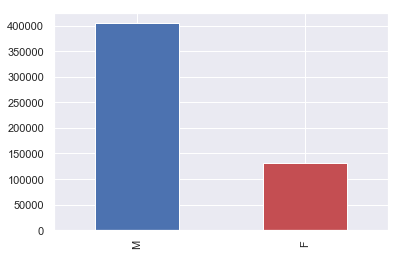

In [6]:
df['Gender'].value_counts().plot(kind = 'bar', color =  ['b','r'])

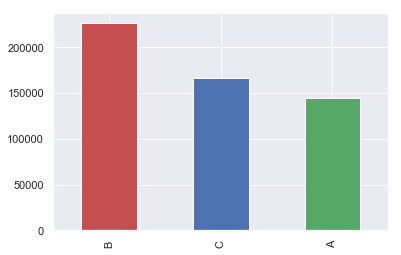

In [7]:
df['City_Category'].value_counts().plot(kind = 'bar', color = ['r','b','g'])

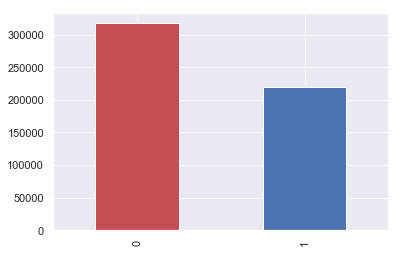

In [8]:
df['Marital_Status'].value_counts().plot(kind = 'bar', color = ['r','b'])

Looking for missing values in the dataset

In [9]:
row = df.isnull().any(axis = 1)
column = df.isnull().any(axis = 0)
df.loc[row, column].head()

,Product_Category_2,Product_Category_3
0,NaN,NaN
2,NaN,NaN
3,14.0,NaN
4,NaN,NaN
5,2.0,NaN


Only two feature columns in the data have missing values

Imputing the missing values in both the columns where some of the values are missing

In [10]:
df['Product_Category_2'].fillna(0, inplace = True)

In [11]:
df['Product_Category_3'].fillna(0, inplace = True)

In [12]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


Splitting the dataset in 60:40 ratio

In [13]:
train = df.iloc[:322546,:]
test = df.iloc[322546:,:]

# Exploratory Data Analysis

Here, we will only be conducting exploratory data analysis on the train set. General EDA can be performed on the entire dataset but that might possibly introduce some sort of bias in the mind of person carrying out the analysis. Also here we are equipped with enough data to split the initial test out and carry out EDA only on the train set. If that is not the case one may opt for exploring the entire dataset.

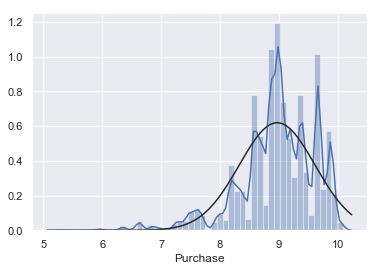

In [14]:
from scipy import stats
from scipy.stats import norm
sns.distplot(np.log(train['Purchase']), fit = norm)

Maximum, Minimum, Median and Mean of purchases with respect to Gender

In [15]:
train.groupby(['Gender'])['Purchase'].agg(['max','mean','median','min'])

,max,mean,median,min
Gender,,,,
F,23948,8806.005062,7931,186
M,23961,9493.718711,8110,185


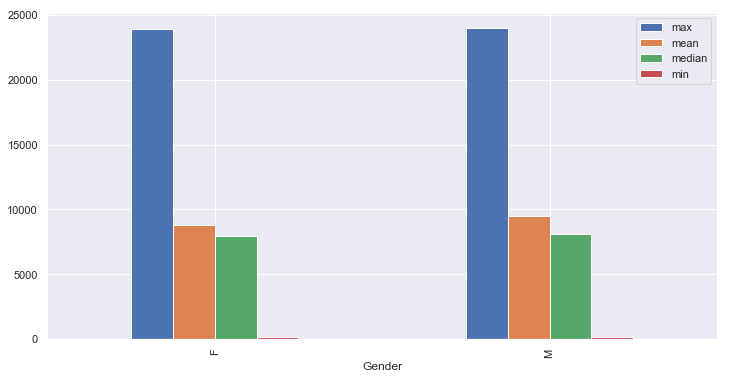

In [16]:
#Plotting the purchase metrics by gender
train.groupby(['Gender'])['Purchase'].agg(['max','mean','median','min']).plot(kind = 'bar', figsize = (12,6))

Maximum, Minimum, Median and Mean of purchases with respect to Age

In [17]:
train.groupby(['Age'])['Purchase'].agg(['max','mean','median','min'])

,max,mean,median,min
Age,,,,
0-17,23953,9061.373518,8030,197
18-25,23958,9213.456903,8033,197
26-35,23961,9305.843884,8042,185
36-45,23949,9392.555799,8073,186
46-50,23960,9271.018816,8048,186
51-55,23939,9636.169075,8222,216
55+,23960,9426.252264,8119,187


Plotting the median and mean purchses by Age groups

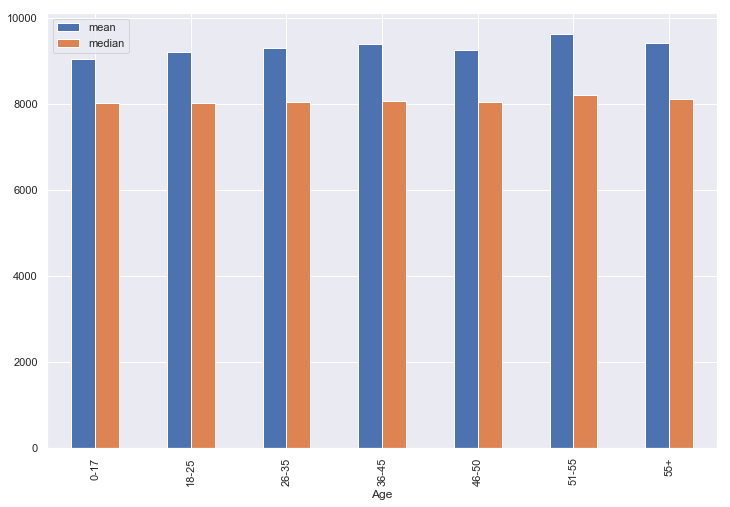

In [18]:
train.groupby(['Age'])['Purchase'].agg(['mean','median']).plot(kind = 'bar', figsize = (12,8))

A more insightful plot for the above metrics could be a boxplot that can help us analyze the spread and also gives a visual of the outliers that is not provided by the bar plot.

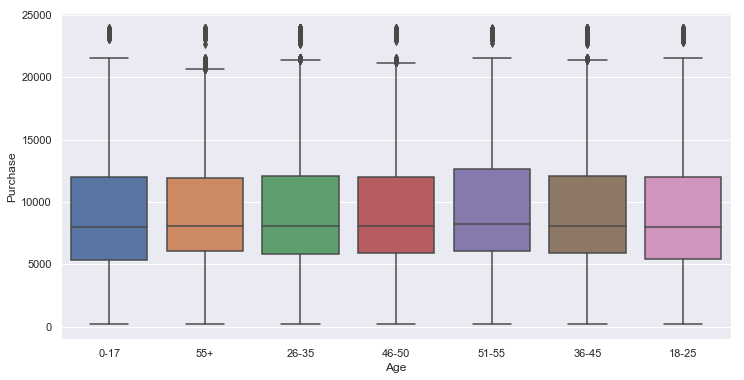

In [19]:
f1 = 'Age'
#Concatenating the 'Age' and 'Purchase' columns
corr_1 = pd.concat([train['Purchase'], train[f1]], axis = 1)
f, ax = plt.subplots(figsize = (12,6))
#Building a box plot on the concatenated columns
figure = sns.boxplot(x = f1, y = 'Purchase', data = corr_1)

Maximum, Minimum, Median and Mean of purchases with respect to Occupation

In [20]:
train.groupby(['Occupation'])['Purchase'].agg(['max','min','median','mean'])

,max,min,median,mean
Occupation,,,,
0,23961,188,8015.0,9177.677076
1,23960,186,7977.0,9012.236195
2,23954,213,7966.0,8998.719349
3,23914,188,8016.0,9240.979813
4,23961,186,8055.0,9274.367021
5,23902,209,8108.0,9394.111573
6,23923,214,8066.0,9355.358582
7,23948,190,8078.0,9486.403807
8,23869,193,8419.5,9616.493377


Plotting the median and mean purchases by Occupation

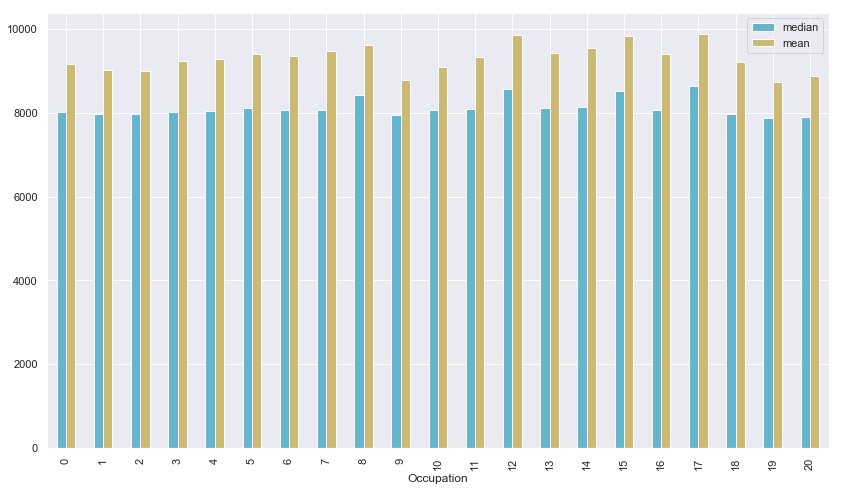

In [21]:
train.groupby(['Occupation'])['Purchase'].agg(['median','mean']).plot(kind = 'bar', figsize = (14,8), color = ['c','y'])

A more insightful plot for the above metrics could be a boxplot that can help us analyze the spread and also gives a visual of the outliers that is not provided by the bar plot.

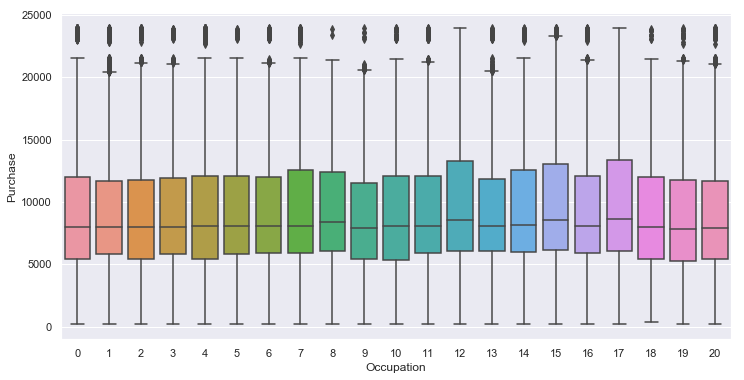

In [22]:
f2 = 'Occupation'
#Concatenating the 'Occupation' and 'Purchase' columns
corr_2 = pd.concat([train['Purchase'], train[f2]], axis = 1)
f, ax = plt.subplots(figsize = (12,6))
#Building a box plot on the concatenated columns
figure = sns.boxplot(x = f2, y = 'Purchase', data = corr_2)

Maximum, Minimum, Median and Mean of purchases with respect to City Category

In [23]:
train.groupby(['City_Category'])['Purchase'].agg(['max','min','mean','median'])

,max,min,mean,median
City_Category,,,,
A,23961,185,8944.583890,7937
B,23960,186,9188.451245,8015
C,23961,187,9841.914170,8622


Plotting the median and mean purchases by City Category

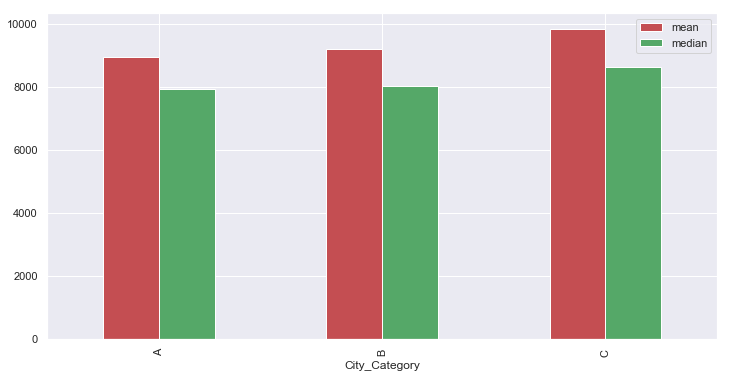

In [24]:
train.groupby(['City_Category'])['Purchase'].agg(['mean','median']).plot(kind = 'bar', figsize = (12,6), color = ['r','g'])

Unique products under Product Category 1 and number of products of each type.

In [25]:
train['Product_Category_1'].nunique()

18

In [26]:
train['Product_Category_1'].value_counts().sort_values()

9       233
17      346
14      889
18     1800
7      2212
12     2330
10     3040
13     3242
15     3735
16     5834
4      7018
6     11893
3     12019
2     14132
11    14296
8     67320
1     82892
5     89315
Name: Product_Category_1, dtype: int64

Plotting the above count distribution in form of a pie chart

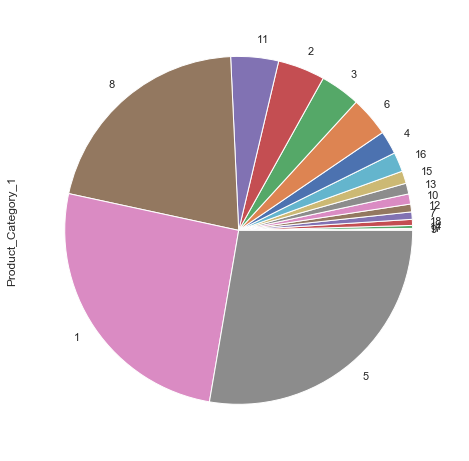

In [27]:
train['Product_Category_1'].value_counts().sort_values().plot(kind = 'pie', figsize = (16,8))

Mean purchase amount by product types in the Product Category 1

Text(0, 0.5, 'Purchase Amount')

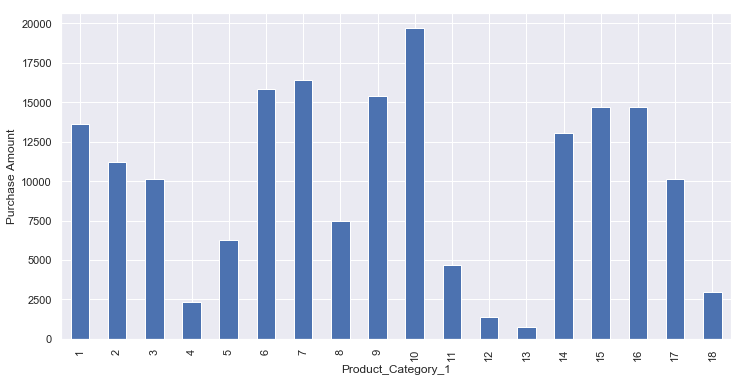

In [28]:
train.groupby(['Product_Category_1'])['Purchase'].mean().plot(kind = 'bar', figsize = (12,6))
plt.ylabel("Purchase Amount")

Unique products under Product Category 2 and number of products of each type.

In [29]:
train['Product_Category_2'].nunique()

18

In [30]:
train['Product_Category_2'].value_counts().sort_values()

7.0       372
18.0     1623
3.0      1691
10.0     1722
12.0     3297
9.0      3344
13.0     6250
17.0     7857
11.0     8353
6.0      9734
4.0     15306
5.0     15612
15.0    22295
16.0    25604
2.0     29069
14.0    32666
8.0     37889
0.0     99862
Name: Product_Category_2, dtype: int64

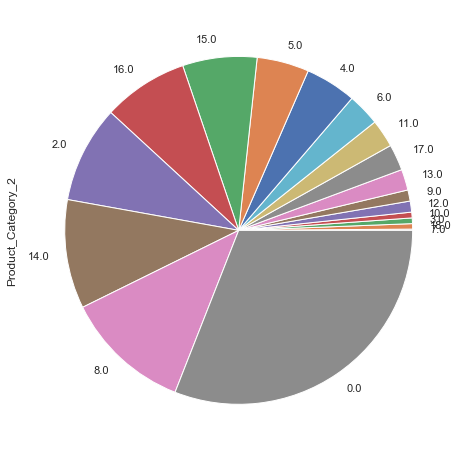

In [31]:
train['Product_Category_2'].value_counts().sort_values().plot(kind = 'pie', figsize = (16,8))

Mean purchase amount by product types in the Product Category 2

Text(0, 0.5, 'Purchase Amount')

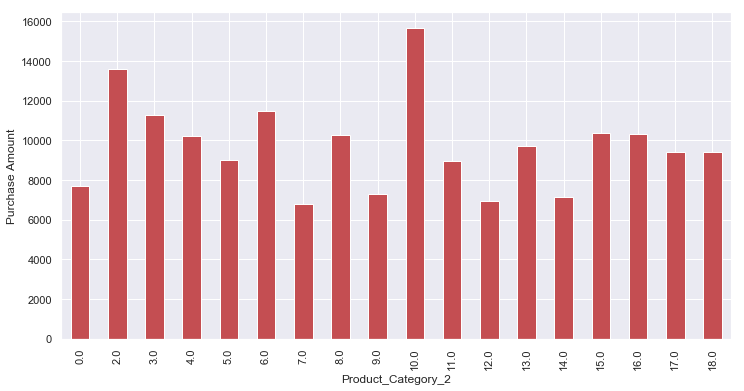

In [32]:
train.groupby(['Product_Category_2'])['Purchase'].mean().plot(kind = 'bar', figsize = (12,6), color = 'r')
plt.ylabel("Purchase Amount")

Unique products under Product Category 3 and number of products of each type.

In [33]:
train['Product_Category_3'].nunique()

16

In [34]:
train['Product_Category_3'].value_counts().sort_values()

3.0        383
10.0      1005
11.0      1099
4.0       1101
18.0      2721
6.0       2913
13.0      3172
12.0      5542
9.0       6953
8.0       7537
5.0       9864
17.0      9955
14.0     10946
15.0     16515
16.0     19365
0.0     223475
Name: Product_Category_3, dtype: int64

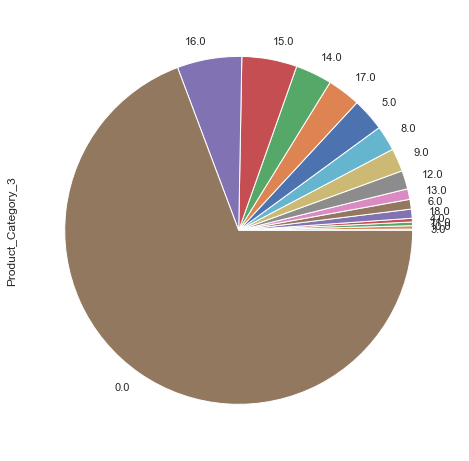

In [35]:
train['Product_Category_3'].value_counts().sort_values().plot(kind = 'pie', figsize = (16,8))

Mean purchase amount by product types in the Product Category 3

Text(0, 0.5, 'Purchase Amount')

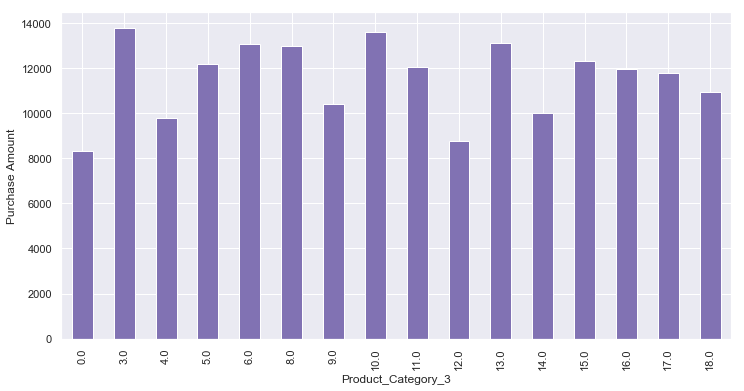

In [36]:
train.groupby(['Product_Category_3'])['Purchase'].mean().plot(kind = 'bar', figsize = (12,6), color = 'm')
plt.ylabel("Purchase Amount")

Maximum, Minimum, Median and Mean of purchases with respect to Stay in Current City

In [37]:
train.groupby(['Stay_In_Current_City_Years'])['Purchase'].agg(['max','min','median','mean'])

,max,min,median,mean
Stay_In_Current_City_Years,,,,
0,23954,185,8036,9225.584859
1,23961,186,8056,9316.124096
2,23961,186,8087,9393.244601
3,23959,187,8057,9337.198060
4+,23948,190,8064,9333.299902


Plotting the mean and median Purchase amounts for categories of stay in Current City (in no. of years)

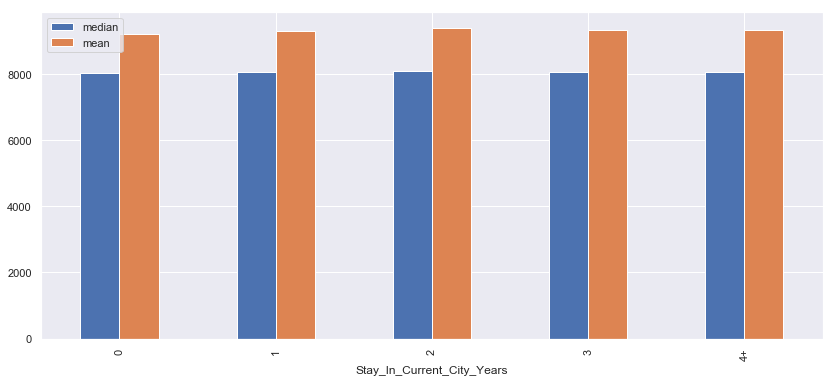

In [38]:
train.groupby(['Stay_In_Current_City_Years'])['Purchase'].agg(['median','mean']).plot(kind = 'bar', figsize = (14,6))
plt.legend(loc = 'upper left')

In [39]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


Number of unique users

In [40]:
train.User_ID.nunique()

5891

Mean purchase amount for each unique user 

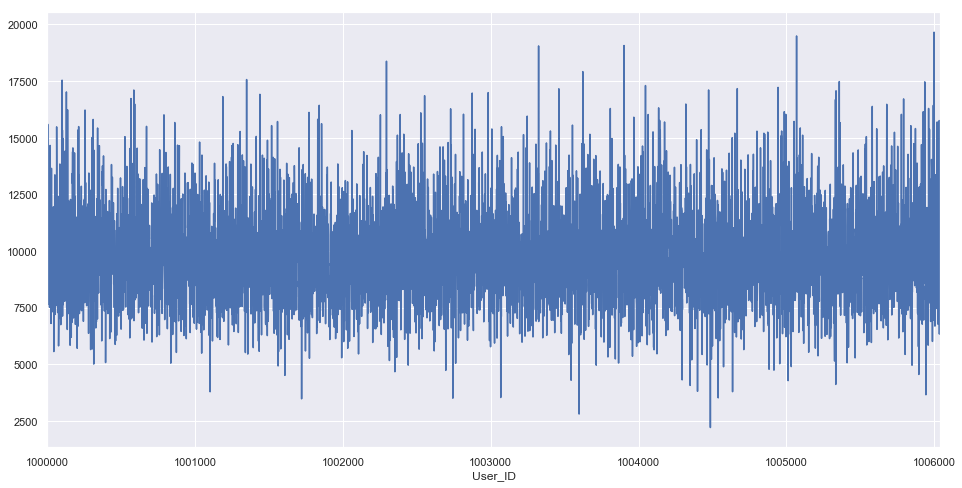

In [41]:
train.groupby(['User_ID'])['Purchase'].mean().plot(figsize = (16,8))

Number of unique products

In [42]:
train.Product_ID.nunique()

3533

Mean purchase amount for each unique product

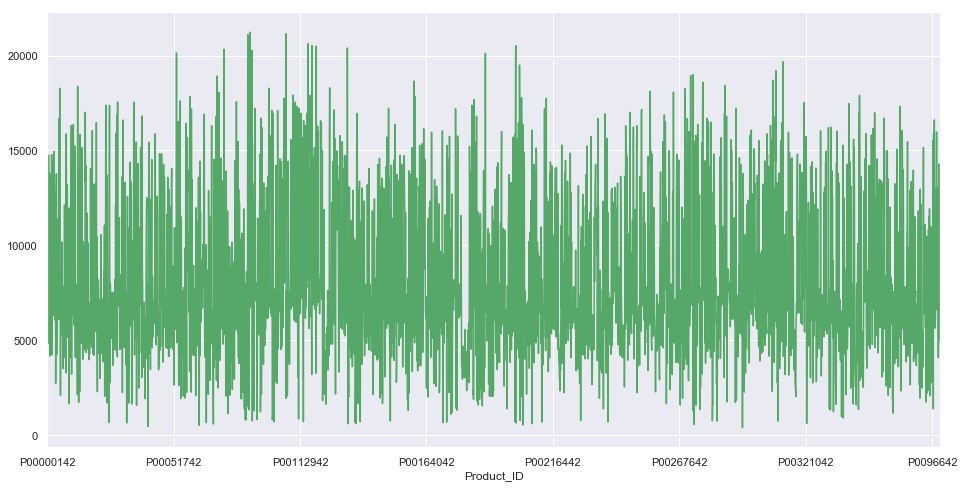

In [43]:
train.groupby(['Product_ID'])['Purchase'].mean().plot(figsize = (16,8), color = 'g')

Correlation among features by means of a HeatMap

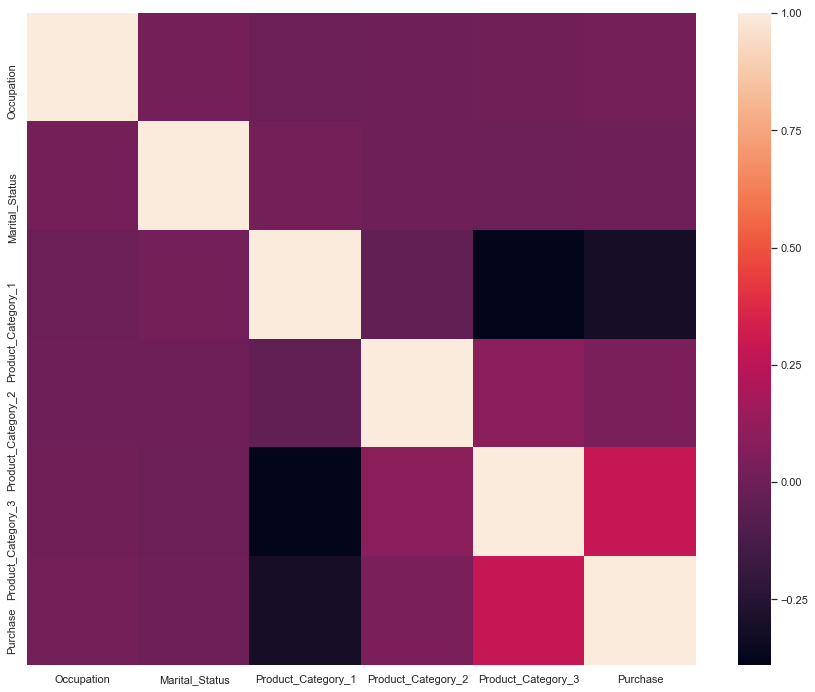

In [44]:
fig,ax = plt.subplots(figsize = (15,12))
sns.heatmap(train.drop(['User_ID','Product_ID'],axis=1).corr())

We can conclude from our Exploratory Analysis and the heatmap above that no single feature has an inherently profound impact on our target i.e. the Purchase amount. Also, the heatmap shows that the Product Category 1 feature a negative correlation with the Purchase amount.

# Feature Engineering

Converting the data type of categorical features to non-numerical

In [45]:
pd.set_option('mode.chained_assignment', None)

train['Occupation'] = train['Occupation'].apply(str)
test['Occupation'] = test['Occupation'].apply(str)

train['Marital_Status'] = train['Marital_Status'].apply(str)
test['Marital_Status'] = test['Marital_Status'].apply(str)

train['Product_Category_1'] = train['Product_Category_1'].apply(str)
test['Product_Category_1'] = test['Product_Category_1'].apply(str)

train['Product_Category_2'] = train['Product_Category_2'].apply(str)
test['Product_Category_2'] = test['Product_Category_2'].apply(str)

train['Product_Category_3'] = train['Product_Category_3'].apply(str)
test['Product_Category_3'] = test['Product_Category_3'].apply(str)

# Label Encoding

Converting categorical features into text for the purpose of using them as  features in our predictive model

Doing this for both the train and test sets as we have already made a train test split

In [46]:
from sklearn.preprocessing import LabelEncoder

col = ('Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status',
       'Product_Category_1','Product_Category_2','Product_Category_3')
for c in col:
    le = LabelEncoder()
    le.fit(list(train[c].values)) 
    train[c] = le.transform(list(train[c].values))    

In [47]:
col = ('Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years','Marital_Status',
       'Product_Category_1','Product_Category_2','Product_Category_3')
for c in col:
    le = LabelEncoder()
    le.fit(list(test[c].values)) 
    test[c] = le.transform(list(test[c].values))    

Readying the features for model fitting and target for predictions

In [48]:
y = train['Purchase']
train.drop(columns = ['Purchase'], inplace = True)
X = train.iloc[:,2:]
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,2,0,2,0,11,0,0
1,0,0,2,0,2,0,0,14,5
2,0,0,2,0,2,0,3,0,0
3,0,0,2,0,2,0,3,5,0
4,1,6,8,2,4,0,16,0,0


In [49]:
y_test_actual = test['Purchase']

test.drop(columns = ['User_ID', 'Product_ID','Purchase'], inplace = True)

In [50]:
 from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(X)

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

# Model Implementation

We'll begin by implementing our model using some Linear Models 

In [52]:
from sklearn.linear_model import Lasso, LinearRegression, ElasticNet
from sklearn import metrics

Fitting the Linear Regression model on the feature data

In [53]:
lm = LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(test)

Testing for perfomance on the test set

In [54]:
model.score(test,y_test_actual)

0.21284653269037002

Fitting the Lasso regression model on data

In [55]:
lasso = Lasso(alpha = 0.0005, random_state = 100)
LR = lasso.fit(X,y)
lasso_Pred = LR.predict(test)
lasso_Pred

array([ 9276.72493144, 13720.81230992, 11876.71775869, ...,
        7386.22867751,  7845.51635808,  8921.3779441 ])

Testing for perfomance on the test set

In [56]:
LR.score(test, y_test_actual)

0.21284653158726852

Fitting the Elastic Net regression model on data

In [57]:
Enet =  ElasticNet(alpha = 0.0005, l1_ratio = .9, random_state = 100)
ENR = Enet.fit(X,y)
ENR_pred = ENR.predict(test)

Testing for perfomance on the test set

In [58]:
ENR_pred

array([ 9276.68796225, 13720.77597936, 11876.7671989 , ...,
        7386.18301331,  7845.47085379,  8921.33313828])

In [59]:
ENR.score(test, y_test_actual)

0.21284653475082804

As evident from all the three models above no linear model seems to perform fairly on the data. Even Elastic Net and Lasso show hardly any improvement in accuracy than the simplest Linear Regression

Let's apply some ensemble techniques and observe if this leads to any improvement in perfomance.

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Fitting the Random Forest Regressor model on the features

In [61]:
rfr = RandomForestRegressor(max_depth=5, random_state=100 ,n_estimators=100)
RFR = rfr.fit(X,y)
pred_RFR = RFR.predict(test)

Perfomance on the test set

In [62]:
rfr.score(test, y_test_actual)

0.6296654939722935

Fitting the Gradient Boosting Regressor on the feature data

In [63]:
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, random_state = 100)
gbr.fit(X,y.ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=100, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

Scores on the test set

In [64]:
GBR = gbr.predict(test)

In [65]:
gbr.score(test, y_test_actual)

0.6501125241901589

Ensemble techniques led to a consierable improvment in the accuracy which suggests that the nature of the effect of features in the target in the data in general is far from linear and thus is evident from the difference in perfomance in the linear and ensemble models on the data.